In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

In [ ]:
pressure_df = pd.read_csv("/content/pressure_day279.csv", header = None)
wind_df = pd.read_csv("/content/wind_day279.csv", header = None)

In [ ]:
min = pressure_df.min().min()
max = pressure_df.max().max()
print('Min :', min)
print('Max :', max)

cluster = round((max-min)/100)
print('Number of cluster: ', cluster)

min1 = wind_df.min().min()
max1 = wind_df.max().max()
print("Min1: ", min1)
print("Max1: ", max1)
cl = round((max1 - min1)/6)
print(cl)

Min : 11121
Max : 12523
Number of cluster:  14
Min1:  -28
Max1:  54
14


In [ ]:
print(np.array(pressure_df))
pressure = np.array(pressure_df).reshape(-1,1)
kmeans = KMeans(n_clusters=cluster)
kmeans.fit(pressure)

wind = np.array(wind_df).reshape(-1,1)
kmeans1 = KMeans(n_clusters = cl)
kmeans1.fit(wind)

[[12481 12480 12479 ... 12417 12419 12422]
 [12480 12480 12479 ... 12414 12415 12416]
 [12478 12478 12478 ... 12413 12412 12411]
 ...
 [11226 11233 11240 ... 11131 11132 11134]
 [11208 11215 11221 ... 11126 11126 11127]
 [11193 11199 11205 ... 11121 11122 11123]]


KMeans(n_clusters=14)

labels: [10 10 10 ...  5  5  5]


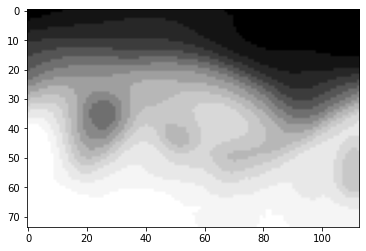

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("labels:", labels)
#print('Centroids: ', centroids)
    
colors = centroids.round(0).astype(int)
#print("colors:", colors)
    
pressure_img = colors[labels].reshape(pressure_df.shape)
pressure_img = np.flip(pressure_img, 0)
plt.imshow(pressure_img, cmap='gray')
plt.show()


[ 7  7  7 ... 13 13 13]
[[ 20]
 [  5]
 [ 50]
 [ 30]
 [ 12]
 [-11]
 [ 36]
 [ -4]
 [  9]
 [ 25]
 [-21]
 [ 43]
 [ 16]
 [  2]]


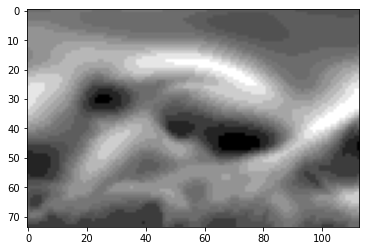

In [ ]:
labels1 = kmeans1.labels_
centroids1 = kmeans1.cluster_centers_
print(labels1)
#print(centroids1)
colors1 = centroids1.round(0).astype(int)
print(colors1)

wind_img = colors1[labels1].reshape(wind_df.shape)
wind_img = np.flip(wind_img, 0)
plt.imshow(wind_img, cmap = "gray")
plt.show()

In [ ]:
#print(pressure_img)
#print(wind_img)
mgd_img = np.stack((pressure_img, wind_img), axis = 2)
#mgd_img = np.mean(mgd_img, axis = 2)

print(mgd_img.shape)


(74, 113, 2)


In [ ]:
#plt.imshow(mgd_img[:,:,1],cmap="gray")
#plt.show()

In [ ]:
df_array = np.stack((np.array(pressure_df), np.array(wind_df)), axis = 2)
print(df_array)

#print(df_array)
(h,w,c) = df_array.shape
print(h,w,c)
img2D = df_array.reshape(h*w, c)

#X = df_array.reshape(-1,1)
kmeans2 = KMeans(n_clusters = cluster)
cluster_labels = kmeans2.fit_predict(img2D)
#kmeans2.fit(X)
print(cluster_labels)

[[[12481    -3]
  [12480    -3]
  [12479    -3]
  ...
  [12417     7]
  [12419     7]
  [12422     7]]

 [[12480     1]
  [12480     2]
  [12479     2]
  ...
  [12414     9]
  [12415     9]
  [12416    10]]

 [[12478     5]
  [12478     6]
  [12478     6]
  ...
  [12413    12]
  [12412    12]
  [12411    13]]

 ...

 [[11226    13]
  [11233    13]
  [11240    13]
  ...
  [11131     3]
  [11132     4]
  [11134     4]]

 [[11208    11]
  [11215    11]
  [11221    11]
  ...
  [11126     3]
  [11126     3]
  [11127     3]]

 [[11193     9]
  [11199     9]
  [11205     9]
  ...
  [11121     2]
  [11122     2]
  [11123     2]]]
74 113 2
[9 9 9 ... 8 8 8]


[[1.24107159e+04 1.17368973e+01]
 [1.12862351e+04 8.70868825e+00]
 [1.19579463e+04 2.18533058e+01]
 [1.15891350e+04 3.04907975e+01]
 [1.21732677e+04 1.18630807e+01]
 [1.17163851e+04 3.09720497e+01]
 [1.14731072e+04 2.20857909e+01]
 [1.22600442e+04 1.30391909e+01]
 [1.11948496e+04 4.46014493e+00]
 [1.24651628e+04 4.04347826e+00]
 [1.20722712e+04 2.12730769e+01]
 [1.18393073e+04 2.76536458e+01]
 [1.23454520e+04 1.39987685e+01]
 [1.13738948e+04 1.34686347e+01]]


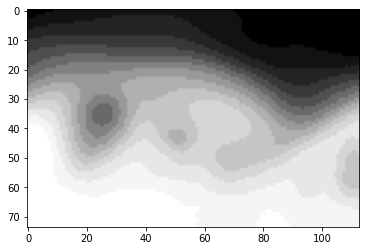

In [ ]:
#labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_
print(centroids2)

colors2 = centroids2.round(0).astype(int)
#print(colors2)

img = np.reshape(colors2[cluster_labels], (h,w,c))
#alpha = np.zeros((74, 113))
#img = np.dstack((img,alpha))


#print(img)

#print(img.shape)
#print(img)
plt.imshow(np.flip(img[:,:,0], axis = 0), cmap = "gray")
#img_rgb = np.concatenate((img, np.zeros_like(img)), axis=2)
#img_rgb[:, :, 2] = 225
#img_rgb[:, :, 3] = 225
#print(img_rgb)
#print(len(img_rgb))
#plt.imshow(img_rgb)

#plt.imshow(img, cmap = "gray")
plt.show()